# The spark Foundation

### Task 1 - Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

### Author :- Akash Vishwakarma

In [1]:
#Importing all required libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets

In [2]:
#Loading iris dataset from datasets

iris = datasets.load_iris()

In [3]:
#Converting dataset into pandas Dataframe

iris = pd.DataFrame(iris.data,columns = iris.feature_names)

In [4]:
#Dataset overview (Top 5 row)

iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
#Dataset overview using .describe()

iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#To check the shape of dataset (number of columns and rows)

iris.shape

(150, 4)

In [7]:
#To check that if there is any null values in dataset

iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [8]:
#To check the info of dataset

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


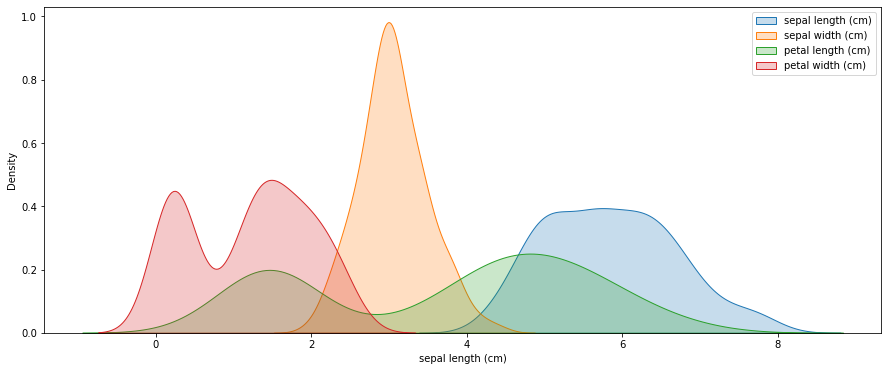

In [9]:
#Plotting of density all the various features in the dataset

fig, ax = plt.subplots(1, 1, figsize=(15, 6))
sns.kdeplot(data=iris['sepal length (cm)'], shade=True)
sns.kdeplot(data=iris['sepal width (cm)'], shade=True)
sns.kdeplot(data=iris['petal length (cm)'], shade=True)
sns.kdeplot(data=iris['petal width (cm)'], shade=True)
plt.legend(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
plt.show()

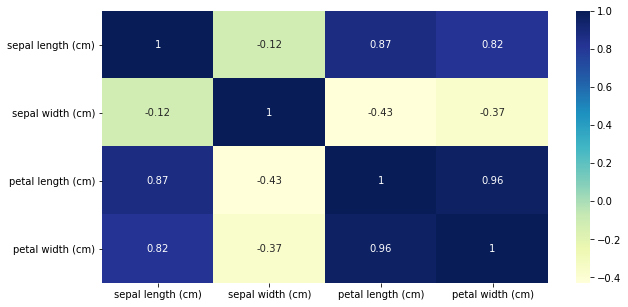

In [10]:
#To check the correlation between all the features to identify most important features for clustering

plt.figure(figsize=(10,5)) 
sns.heatmap(iris.corr(),annot=True, cmap = "YlGnBu" ) 
plt.show()

### As we can see from the above heatmap the two features i.e "The Petal Length" and "The Petal Width" are highly correlated.So we can conclude that these two features are important in identifying the number of clusters.

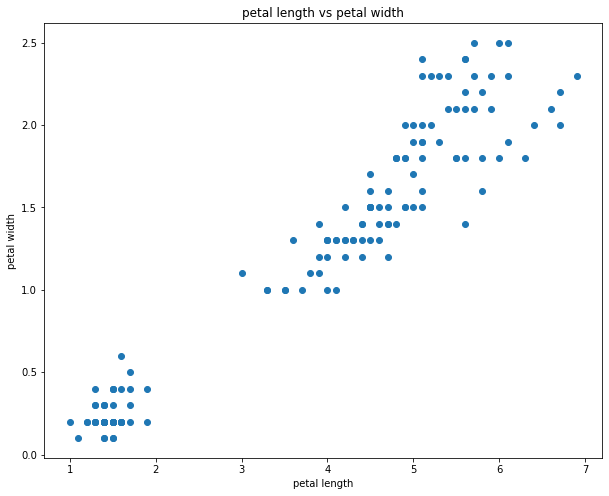

In [11]:
#Plotting two important features i.e "The Petal Length" and "The Petal Width" on scatter plot

plt.figure(figsize=(10,8))     
plt.scatter(x="petal length (cm)",y="petal width (cm)",data=iris)
plt.xlabel("petal length")     
plt.ylabel("petal width")
plt.title("petal length vs petal width")
plt.show()

In [12]:
#Importing required KMneans from sklearn

from sklearn.cluster import KMeans

### For identifying clusters we are going to take random clusters from 1 to 10 and going to plot graph between number of clusters and "WCSS"



In [13]:
# Finding the value of wcss

wcss=[]
for i in range(1,11):
    model=KMeans(n_clusters=i, init='k-means++', n_init=10 ,max_iter=300, 
                        tol=0.0001, random_state=99)
    model.fit(iris[["petal length (cm)","petal width (cm)"]])
    wcss.append(model.inertia_)
print(wcss)

[550.8953333333333, 86.39021984551391, 31.371358974358966, 19.48300089968511, 13.91690875790876, 11.070652341896283, 9.281343349632822, 7.6723624030431825, 6.592736809084635, 5.635610102457928]


## plotting graph using clusters and wcss, So that it will form shape of elbow and at the point where it will form elbow we are going to take that point as the number of clusters for our dataset and will create that many number od clusters .

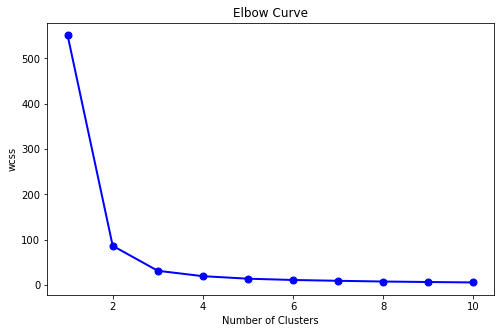

In [14]:
# Finding the Eblow curve for determining the number of clusters

plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,color="b",marker='o',linewidth=2, markersize=7)
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.title("Clusters vs wcss",text='Elbow Curve', x=0.5)
plt.show()

## From the above graph we can clearly see that it is forming elbow at point 3 and so therefore we are going to create 3 Clusters.

In [15]:
#Fitting model and predicting cluster

model=KMeans(n_clusters=3)
clusters=model.fit_predict(iris[["petal length (cm)","petal width (cm)"]])

In [16]:
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:
#Adding predicted clusters in our original dataset

iris["Species"]=clusters

In [18]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
#Checking the centers of clusters for further visualization 

model.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

In [20]:
#Creating different datasets for different clusters

Cluster2=iris[iris.Species==2]
Cluster0=iris[iris.Species==0]
Cluster1=iris[iris.Species==1]

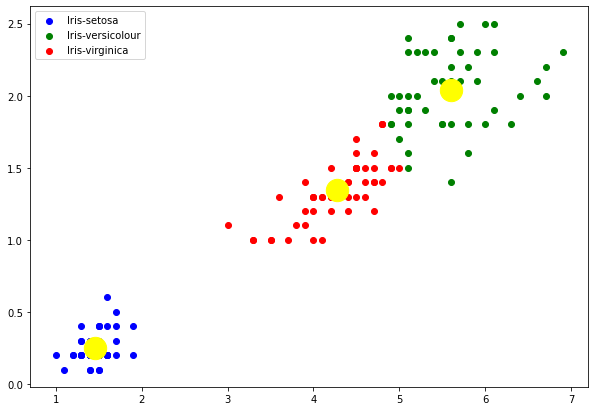

In [21]:
#Plotting graph of all datasets with clusters with there respective centers, also labelled the clusters

plt.figure(figsize=(10,7))
plt.scatter(Cluster0["petal length (cm)"],Cluster0["petal width (cm)"],color="blue",label="Iris-setosa")
plt.scatter(Cluster1["petal length (cm)"],Cluster1["petal width (cm)"],color="green",label="Iris-versicolour")
plt.scatter(Cluster2["petal length (cm)"],Cluster2["petal width (cm)"],color="red",label="Iris-virginica")
plt.scatter(model.cluster_centers_[:, 0],model.cluster_centers_[:,1],color= "yellow",marker="o",s=500)
plt.legend()
plt.show()

### ----------------------------------------------Thank you--------------------------------------------------------